# Random Forests
[Decision trees](../6.%20Decision%20Trees/decision_tree.ipynb) are highly sensitive to training data and can easily overfit. [Random forests](https://www.ibm.com/think/topics/random-forest) reduce this sensitivity by creating multiple decision trees trained on different bootstrapped samples (random sampling with replacement). For each tree, only a random subset of features is considered during training to reduce correlation between trees. Although some trees may perform poorly, their errors are averaged out during prediction through a process called aggregation. These features make random forests more stable and generalizable than a single decision tree.

Random forests is one example of [ensemble methods](../8.%20Ensemble%20Methods/ensemble_methods.ipynb), which is an approach in machine learning that combines the predictions of multiple models to create a more accurate and robust final output.

## Algorithm

1. **Bootstrap Sampling**
   Randomly draw multiple samples *with replacement* from the original training dataset. Each sample becomes the training data for one decision tree.

2. **Feature Subsampling**
   For each split in a decision tree, randomly select a subset of features rather than considering all features. This increases tree diversity.

3. **Train Decision Trees**
   Train a decision tree on each bootstrap sample using only the randomly selected subset of features at each split.

4. **Aggregate Predictions**

   * For **classification**: Each tree casts a vote, and the most common class is selected (majority voting).
   * For **regression**: The average of the predictions from all trees is taken.

5. **Use Out-of-Bag (OOB) Samples for Validation**
   Roughly one-third of the data not used in training each tree (the out-of-bag data) is used to estimate model accuracy, reducing the need for a separate validation set.

6. **Make Final Prediction**
   For new, unseen data, run it through all trees and combine their outputs (vote or average) to make the final prediction.

** bootstrapping + aggregation = bagging

<center><img src="diagram.png"/></center>

We will continue using the [cardiovascular disease dataset](https://www.kaggle.com/datasets/akshatshaw7/cardiovascular-disease-dataset) from the [`decision_tree.ipynb`](../6.%20Decision%20Trees/decision_tree.ipynb) to demonstrate the improvements made by random forest, so refer to that notebook for data exploration.


## Implement and Evaluate Model
Using [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) from scikit learn.

Accuracy: 0.7266

Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6977
           1       0.76      0.67      0.71      7023

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



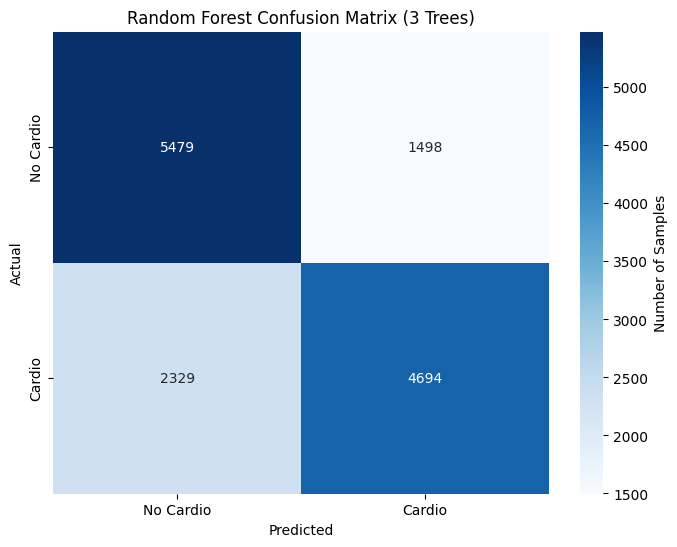

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
health_data = pd.read_csv("health_data.csv")

# Prepare features and target
X = health_data.drop(columns=["cardio"])
y = health_data["cardio"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build and train Random Forest with 3 trees
rf_clf = RandomForestClassifier(
    n_estimators=3,         # Only 3 trees
    max_depth=5,            # Limit depth for visibility
    random_state=42
)
rf_clf.fit(X_train, y_train)

# Predict
y_pred = rf_clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["No Cardio", "Cardio"], 
            yticklabels=["No Cardio", "Cardio"],
            cbar_kws={'label': 'Number of Samples'})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest Confusion Matrix (3 Trees)')
plt.show()



Compared to the individual decision tree, the random forest model shows a clear improvement in performance. The accuracy increases from 0.6389 (decision tree with 53 layers) to 0.7266 (random forest with 3 trees). However, from the `Decision Tree Accuracy vs MaxDepth` graph, a single decision tree can have up to an accuracy of around 0.73. The confusion matrix confirms this with fewer false positives and false negatives in the random forest.

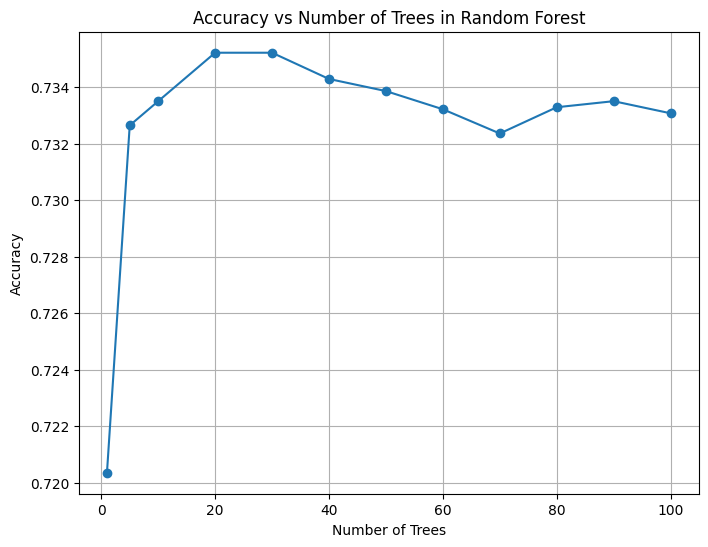

In [12]:
# List of tree counts to try
tree_counts = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
accuracies = []

# Train a Random Forest for each number of trees
for n_trees in tree_counts:
    rf = RandomForestClassifier(n_estimators=n_trees, max_depth=5, random_state=42, bootstrap=False)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot the results
plt.figure(figsize=(8,6))
plt.plot(tree_counts, accuracies, marker='o')
plt.title('Accuracy vs Number of Trees in Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

The graph shows that as the number of trees in the random forest increases, the accuracy initially improves, peaking around 20–30 trees with an accuracy of approximately 0.735. After this point, the accuracy stabilizes and begins to slightly fluctuate or decline, suggesting diminishing returns with more trees. This indicates that while adding more trees can enhance performance up to a point, beyond that it offers minimal benefit and may increase computation time without significant accuracy gains.